# INSTALL

In [ ]:
!pip install pytesseract keras_ocr easyocr -q

# IMPORTS

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from IPython.display import clear_output

In [8]:
!cd /content/drive/MyDrive/Colab Notebooks/datasets/Parle-G_Training

/bin/bash: line 0: cd: too many arguments


In [2]:
import pytesseract
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
url = ['https://raw.githubusercontent.com/gamingflexer/parleg-alpha/main/Training/img_001.jpg?token=GHSAT0AAAAAABPM7Q5ZHDTRAGZNYHOGL4HMYS4MG5Q']
images = [ keras_ocr.tools.read(i) for i in url]

<a id="kerasocr"></a>
# KERAS_OCR

In [14]:
pipline = keras_ocr.pipeline.Pipeline() #Creting a pipline 
kerasocr_preds = pipline.recognize(images)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
fig,axs = plt.subplots(nrows = 1 , figsize = (30,30))
for ax , image,  prediction in zip(axs , images , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

<a id="easyocr"></a>
# EASYOCR

In [6]:
text_reader = easyocr.Reader(['en']) #Initialzing the ocr

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


GCHMD
BF819
144X 60 9
This sidejue
4
Trat
arle-G
Original Gluco" Biscuits
Prn
HELRAl?oaeieraunori
@Ni


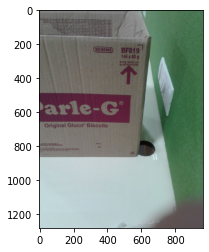

In [28]:
results = text_reader.readtext(images[0] )
for (bbox, text, prob) in results:
    print(text)
plt.imshow(images[0])

In [17]:
data = []
for (bbox, text, prob) in results:
    data = data + [text]

In [18]:
data

['GCHMD',
 'BF819',
 '144X 60 9',
 'This sidejue',
 '4',
 'Trat',
 'arle-G',
 'Original Gluco" Biscuits',
 'Prn',
 'HELRAl?oaeieraunori',
 '@Ni']

In [27]:
import re
for i in data:
  final = re.search("^[a-zA-Z0-9_]*$", i)
  print(final)

<re.Match object; span=(0, 5), match='GCHMD'>
<re.Match object; span=(0, 5), match='BF819'>
None
None
<re.Match object; span=(0, 1), match='4'>
<re.Match object; span=(0, 4), match='Trat'>
None
None
<re.Match object; span=(0, 3), match='Prn'>
None
None


<a id="pytesseract"></a>
# Pytesseract

In [ ]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr

In [4]:
tesseract_preds = []
for img in images:
    tesseract_preds.append(pytesseract.image_to_string(img))

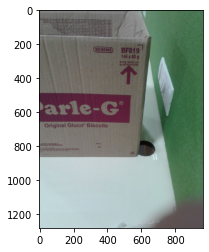

In [5]:
print(tesseract_preds[0])
plt.imshow(images[0])